In [ ]:
from tensorflow.keras.datasets import mnist
from imutils import build_montages
import numpy as np
import cv2

In [ ]:
def make_pairs(images, labels):
  pairImages = []
  pairLabels = []
  numClasses = len(np.unique(labels))
  idx = [np.where(labels == i)[0] for i in range(0, numClasses)]
  for idxA in range(len(images)):
    currentImage = images[idxA]
    label = labels[idxA]

    idxB = np.random.choice(idx[label])
    posImage = images[idxB]

    pairImages.append([currentImage, posImage])
    pairLabels.append([1])

    negIdx = np.where(labels != label)[0]
    negImage = images[np.random.choice(negIdx)]

    pairImages.append([currentImage, negImage])
    pairLabels.append([0])

  return (np.array(pairImages), np.array(pairLabels))

In [ ]:
(trainX, trainY), (testX, testY) = mnist.load_data()

(pairTrain, labelTrain) = make_pairs(trainX, trainY)
(pairTest, labelTest) = make_pairs(testX, testY)

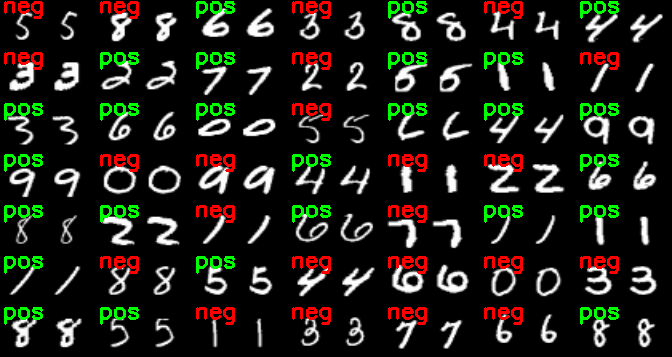

-1

In [ ]:
images = []
from google.colab.patches import cv2_imshow
for i in np.random.choice(np.arange(0, len(pairTrain)), size=(49,)):
  imageA = pairTrain[i][0]
  imageB = pairTrain[i][0]
  label = labelTrain[i]

  output = np.zeros((36, 60), dtype="uint8")
  pair = np.hstack([imageA, imageB])
  output[4:32, 0:56] = pair

  text = "neg" if label[0] == 0 else "pos"
  color = (0, 0, 255) if label[0] == 0 else (0, 255, 0)

  vis = cv2.merge([output] * 3)
  vis = cv2.resize(vis, (96, 51), interpolation=cv2.INTER_LINEAR)
  cv2.putText(vis, text, (2, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)

  images.append(vis)

montage=build_montages(images, (96, 51), (7, 7))[0]

cv2_imshow(montage)
cv2.waitKey(0)